In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

print("TensorFlow:", tf.__version__)

# 1) Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# 2) Normalize
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# 3) Train / val split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

print("Train:", x_train.shape, y_train.shape)
print("Val:  ", x_val.shape,   y_val.shape)
print("Test: ", x_test.shape,  y_test.shape)

input_shape = (32, 32, 3)
num_classes = 10

# 4) Very simple CNN
model = models.Sequential([
    layers.Input(shape=input_shape),

    layers.Conv2D(32, (3,3), padding="same", activation="relu"),
    layers.MaxPooling2D(2),

    layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    layers.MaxPooling2D(2),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model.summary()

# 5) Compile
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# 6) Train for a few epochs
history = model.fit(
    x_train, y_train,
    epochs=3,
    batch_size=64,
    validation_data=(x_val, y_val)
)


TensorFlow: 2.20.0
Train: (40000, 32, 32, 3) (40000,)
Val:   (10000, 32, 32, 3) (10000,)
Test:  (10000, 32, 32, 3) (10000,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282,250 (1.08 MB)

 Trainable params: 282,250 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.4674 - loss: 1.4778 - val_accuracy: 0.5624 - val_loss: 1.2340
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6063 - loss: 1.1199 - val_accuracy: 0.6191 - val_loss: 1.0902
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6576 - loss: 0.9779 - val_accuracy: 0.6457 - val_loss: 1.0360


In [12]:
from tensorflow.keras import layers, models, regularizers

def build_better_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        # Block 1
        layers.Conv2D(32, (3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),
        layers.Dropout(0.25),

        # Block 2
        layers.Conv2D(64, (3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),
        layers.Dropout(0.25),

        # Block 3
        layers.Conv2D(128, (3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ])

    return model

model = build_better_cnn(input_shape, num_classes)
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 815,914 (3.11 MB)

 Trainable params: 815,018 (3.11 MB)

 Non-trainable params: 896 (3.50 KB)

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


Test accuracy: 0.6389
Test loss: 1.0374


In [9]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict probabilities on test set
y_pred_probs = model.predict(x_test)

# Convert probabilities to predicted class labels (0–9)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Classification report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nConfusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification report:
              precision    recall  f1-score   support

           0     0.5689    0.8260    0.6737      1000
           1     0.8414    0.6630    0.7416      1000
           2     0.5446    0.4880    0.5148      1000
           3     0.4900    0.4160    0.4500      1000
           4     0.6404    0.5040    0.5641      1000
           5     0.4469    0.7150    0.5500      1000
           6     0.7183    0.7830    0.7493      1000
           7     0.7353    0.7000    0.7172      1000
           8     0.8697    0.6210    0.7246      1000
           9     0.7718    0.6730    0.7190      1000

    accuracy                         0.6389     10000
   macro avg     0.6627    0.6389    0.6404     10000
weighted avg     0.6627    0.6389    0.6404     10000


Confusion matrix:
[[826   8  46  18   9  23   7  14  26  23]
 [ 79 663  11  21   5  28  20  20  19 134]
 [103   3 488  53  91 142  73  36   8   3]
 [ 35   1  69 416  50 318  71

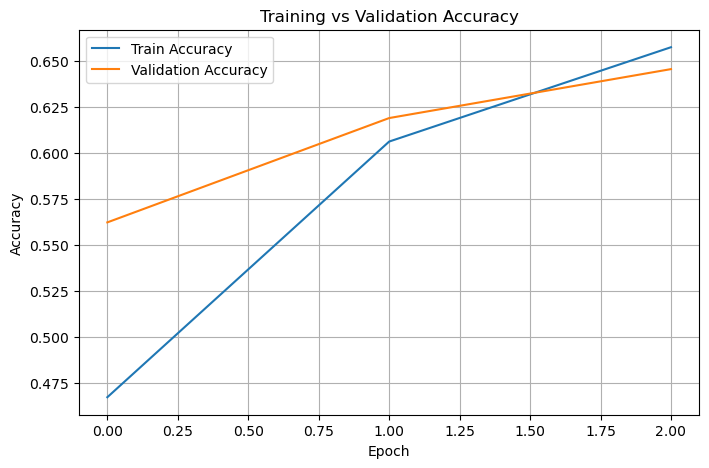

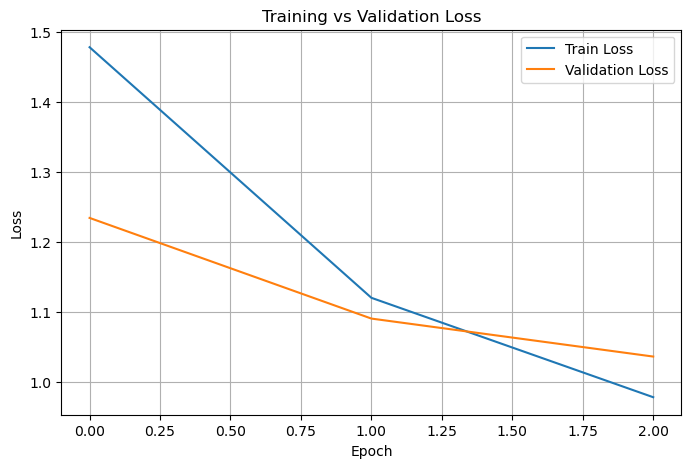

In [10]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Accuracy curve
    plt.figure(figsize=(8,5))
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss curve
    plt.figure(figsize=(8,5))
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


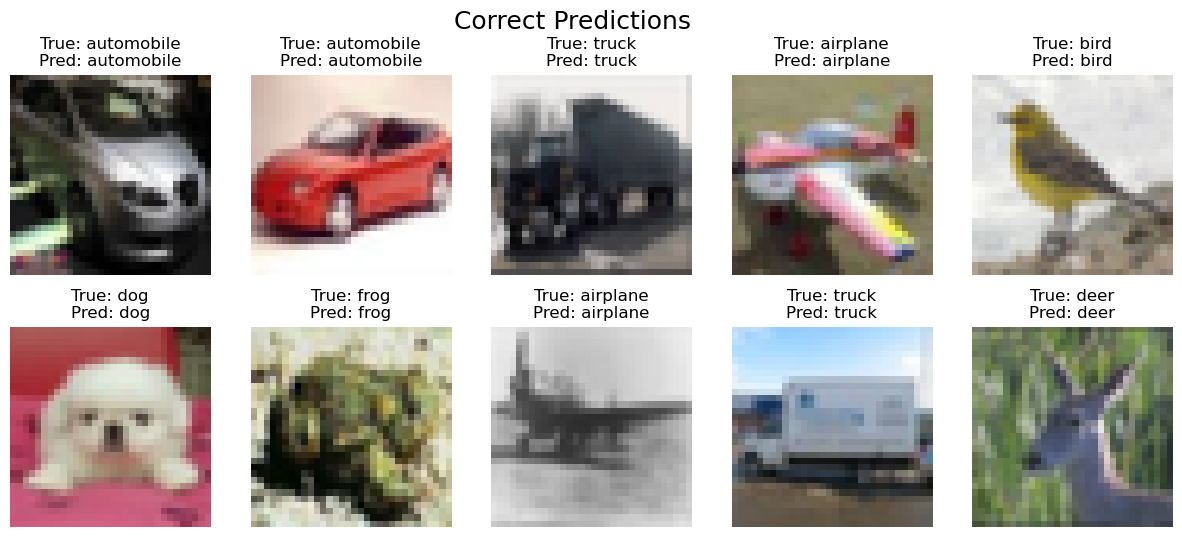

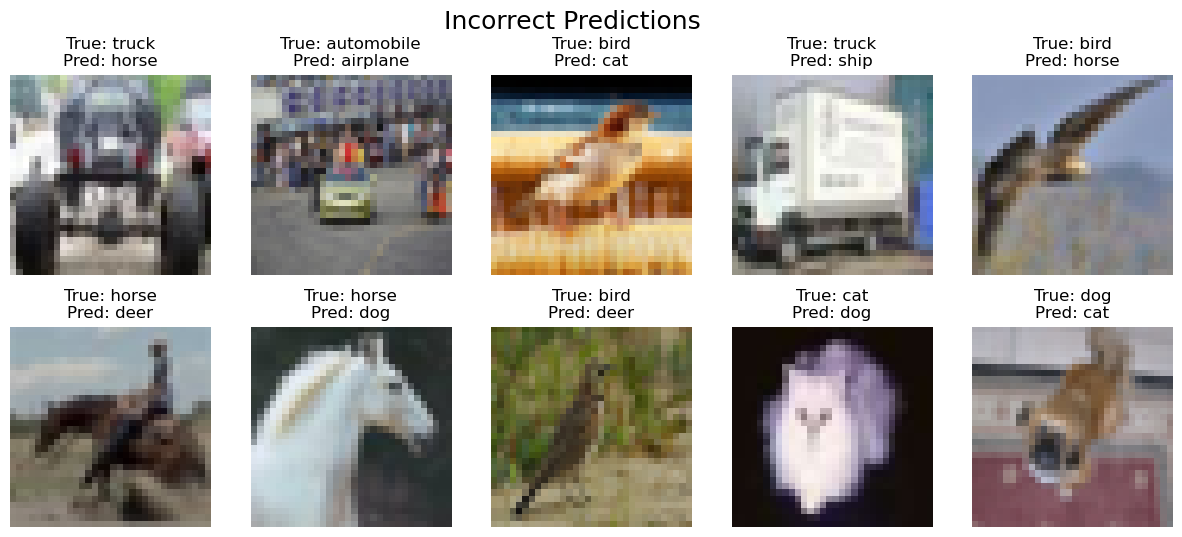

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Class names for CIFAR-10
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Predict test set labels
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

def show_examples(correct=True, count=10):
    plt.figure(figsize=(15, 6))

    if correct:
        idxs = np.where(y_pred == y_test)[0]
        title = "Correct Predictions"
    else:
        idxs = np.where(y_pred != y_test)[0]
        title = "Incorrect Predictions"

    idxs = np.random.choice(idxs, size=min(count, len(idxs)), replace=False)

    for i, idx in enumerate(idxs):
        plt.subplot(2, 5, i+1)
        plt.imshow(x_test[idx])
        plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred[idx]]}")
        plt.axis("off")

    plt.suptitle(title, fontsize=18)
    plt.show()

show_examples(correct=True, count=10)
show_examples(correct=False, count=10)
